## 繪圖相關套件
- Matplotlib：Python 最常被使用到的繪圖套件
- Seaborn：以 matplotlib 為底層的高階繪圖套件

<BarContainer object of 3 artists>

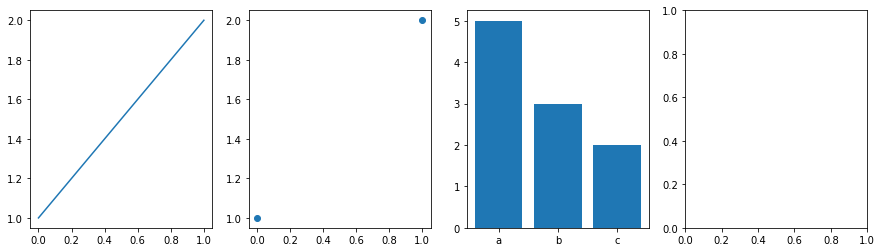

In [1]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1,ncols=4) #分割
fig.set_size_inches(15, 4) # 畫布大小
axes[0].plot([0,1],[1,2]) #.plot 直線
axes[1].scatter([0,1],[1,2]) #.scatter 點
axes[2].bar(["a",'b','c'],[5,3,2]) #.bar 長條圖

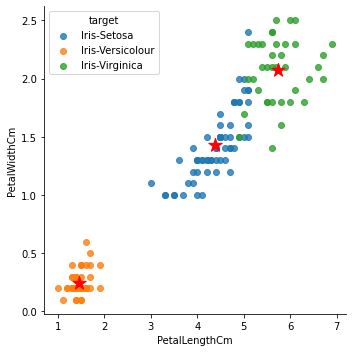

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
#y = df_data['Species']

kmeansModel = KMeans(n_clusters=3, random_state=46)
clusters_pred = kmeansModel.fit_predict(X) #分類結果

df_data['Predict']=clusters_pred


sns.lmplot( x = "PetalLengthCm", y = "PetalWidthCm", data=df_data, hue="Predict", fit_reg=False, legend=False) #放入目標data所有位置
plt.scatter(kmeansModel.cluster_centers_[:, 2],kmeansModel.cluster_centers_[:, 3], s=200,c="r",marker='*') #畫星號
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']) #放入label
plt.show()

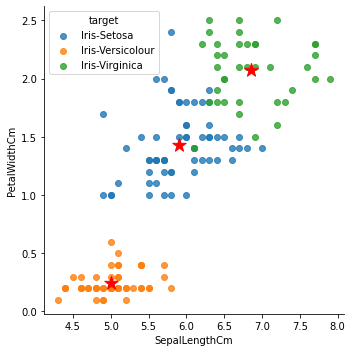

In [10]:
df_data['Predict']=clusters_pred
sns.lmplot(x = "SepalLengthCm", y = "PetalWidthCm", data=df_data, hue="Predict", fit_reg=False, legend=False) #放入目標data所有位置
plt.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 3], s=200,c="r",marker='*') #畫星號
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']) #放入label
#plt.axis([4,9,0,3])
plt.show()

## 散佈圖矩陣 (SPLOM)
pandas.plotting.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs)

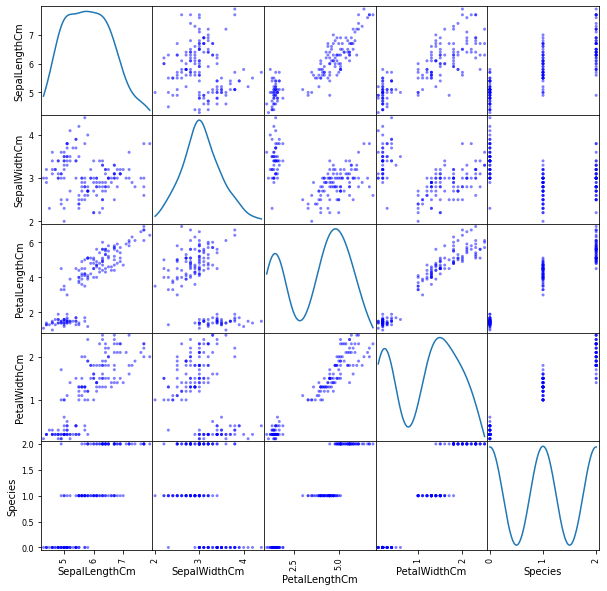

In [13]:
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix
import numpy as np
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], #np.c[] : 按行合併
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
scatter_matrix( df_data,figsize=(10, 10),color='b',diagonal='kde')
print()

## plt.annotate(s, xy, *args, **kwargs)
annotate用於在圖形上給資料新增文字註解，而且支援帶箭頭的劃線工具，方便我們在合適的位置新增描述資訊。
- s：註釋文字的內容
- xy：被註釋的座標點，二維元組形如(x,y)
- xytext：註釋文字的座標點，也是二維元組，預設與xy相同
- xycoords：被註釋點的座標系屬性，允許輸入的值如下
    * 'figure points' :	以繪圖區左下角為參考，單位是點數
    * 'figure pixels' : 以繪圖區左下角為參考，單位是畫素數
    * 'figure fraction' : 以繪圖區左下角為參考，單位是百分比
    * 'axes points'	 :  以子繪圖區左下角為參考，單位是點數（一個figure可以有多個axex，預設為1個）
    * 'axes pixels'	 :  以子繪圖區左下角為參考，單位是畫素數
    * 'axes fraction' : 以子繪圖區左下角為參考，單位是百分比
    * 'data'	 :      以被註釋的座標點xy為參考 (預設值)
    * 'polar'	 :      不使用本地資料座標系，使用極座標系

- textcoords ：註釋文字的座標系屬性，預設與xycoords屬性值相同，也可設為不同的值。除了允許輸入xycoords的屬性值，還允許輸入以下兩種
    * 'offset points'	相對於被註釋點xy的偏移量（單位是點）
    * 'offset pixels'	相對於被註釋點xy的偏移量（單位是畫素）

- arrowprops：箭頭的樣式，dict（字典）型資料，如果該屬性非空，則會在註釋文字和被註釋點之間畫一個箭頭。如果不設定'arrowstyle' 關鍵字，則允許包含以下關鍵字：
    * width	箭頭的寬度（單位是點）
    * headwidth	箭頭頭部的寬度（點）
    * headlength	箭頭頭部的長度（點）
    * shrink	箭頭兩端收縮的百分比（佔總長

參考 : https://www.796t.com/content/1544608110.html

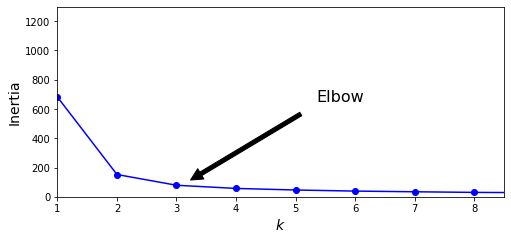

In [4]:
# k = 1~9 做9次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]

plt.figure(figsize=(8, 3.5)) #圖大小
plt.plot(range(1, 10), inertias, "bo-") #bo- : 圓點 跟 線
plt.xlabel("$k$", fontsize=14) #斜體k ,大小14
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[3]), #箭頭的頭
             xytext=(0.55, 0.55), #箭頭的尾巴
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

#### plt.style.use 設置背景樣式
plt.style.use('樣式') 可以改變圖片背景，可用樣式可以用 plt.style.available 查詢\
[參考網址](https://blog.csdn.net/qq_22592457/article/details/105636480)


In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

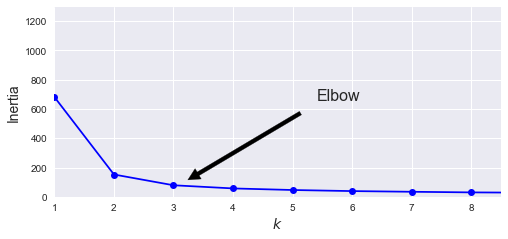

In [5]:
plt.style.use('seaborn')
# k = 1~9 做9次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]

plt.figure(figsize=(8, 3.5)) #圖大小
plt.plot(range(1, 10), inertias, "bo-") #bo- : 圓點 跟 線
plt.xlabel("$k$", fontsize=14) #斜體k ,大小14
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[3]), #箭頭的頭
             xytext=(0.55, 0.55), #箭頭的尾巴
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

## 點連線, 虛線

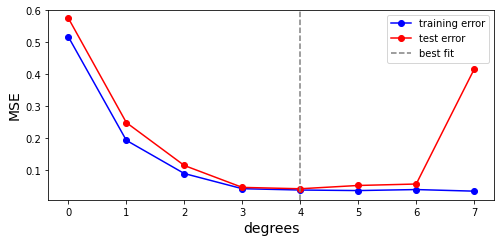

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 生成虛擬數據
np.random.seed(32)
data = 5 * np.random.rand(200, 2)
train_X = data[:150]
test_X  = data[150:]
train_y = np.sin(train_X) + np.random.normal(0, 0.2, (train_X.shape[0], 2))
test_y = np.sin(test_X) + np.random.normal(0, 0.2, (test_X.shape[0],2) )

# 適合不同次數的多項式模型
degrees = [i for i in range(8)]
mse_list = [[], []]
for i, degree in enumerate(degrees):

    # transformed data
    poly_features = PolynomialFeatures(degree = degree)
    train_X_poly_transformed = poly_features.fit_transform(train_X)
    test_X_poly_transformed = poly_features.transform(test_X)

    # fit model
    reg_poly = LinearRegression()
    reg_poly.fit(train_X_poly_transformed, train_y)

    # pred data
    pred_y = reg_poly.predict(train_X_poly_transformed)
    mse_list[0].append(mean_squared_error(train_y, pred_y))
    pred_y = reg_poly.predict(test_X_poly_transformed)
    mse_list[1].append(mean_squared_error(test_y, pred_y))

# k = 1~9 做9次kmeans, 並將每次結果的inertia收集在一個list裡

plt.figure(figsize=(8, 3.5)) #圖大小
plt.plot(degrees, mse_list[0], "bo-", label = 'training error') #bo- : 藍色 圓點 跟 線
plt.plot(degrees, mse_list[1], "ro-", label = 'test error') #ro- : 紅色 圓點 跟 線
plt.axvline(x = 4, color='gray', linestyle='--', label='best fit') # 添加垂直虛線
plt.xlabel("degrees", fontsize=14) #斜體k ,大小14
plt.ylabel("MSE", fontsize=14)
plt.legend() # 圖示


plt.show()